# CS5785 Homework 1 Part I

[Yufan Zhang](http://yufanbruce.com) (yz2894)


## Preparation


In [19]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import time

# Ignore any warnings
import warnings

warnings.filterwarnings("ignore")

In [20]:
# PATH variables
DATA_PATH = "./data/Part_I/"
IMG_PATH = "./img/Part_I/"
RESULT_PATH = "./result/Part_I/"

if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH)

if not os.path.exists(RESULT_PATH):
    os.makedirs(RESULT_PATH)

## Data Ingestion


In [21]:
# Load the training and test data
def load_data_from_csv(filename):
    """
    Load the data to a Pandas dataframe from a file

    Args:
        filename: string containing the path to the dataset

    Return:
        a Pandas dataframe containing the loaded data
    """
    return pd.read_csv(os.path.join(DATA_PATH, filename), index_col=0)

# Load the train data
df = load_data_from_csv("train.csv")
print(f"Shape of the training data: {df.shape}")

# Set the target variable
target = df["SalePrice"]
print(f"Shape of the training Y: {target.shape}")

df

Shape of the training data: (1460, 80)
Shape of the training Y: (1460,)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [22]:
# Extract the numerical features
column_types = df.dtypes

num_features = column_types[column_types != "object"].index.tolist()
print(f"Numerical features: ({len(num_features)})")
print(num_features)
print()

# Extract the categorical features
cat_features = column_types[column_types == "object"].index.tolist()
print(f"Categorical features: ({len(cat_features)})")
print(cat_features)

Numerical features: (37)
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical features: (43)
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fi

In [23]:
df["HouseStyle"].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

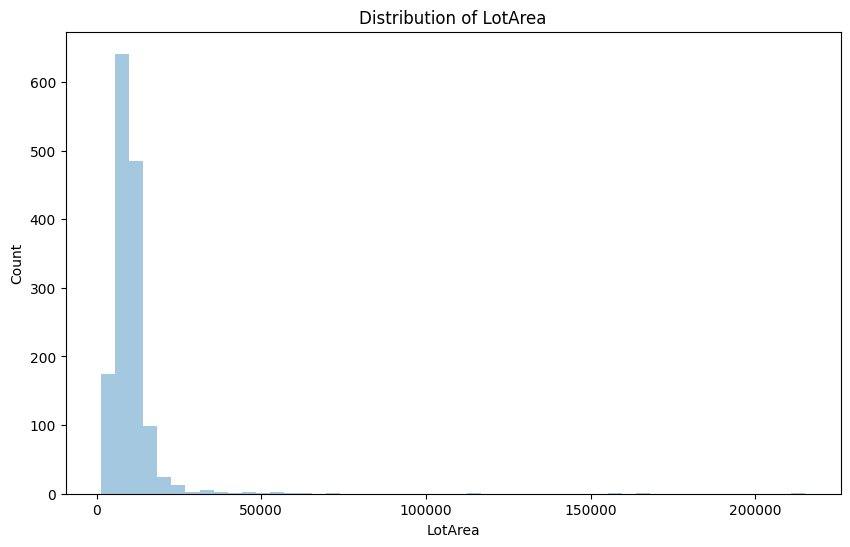

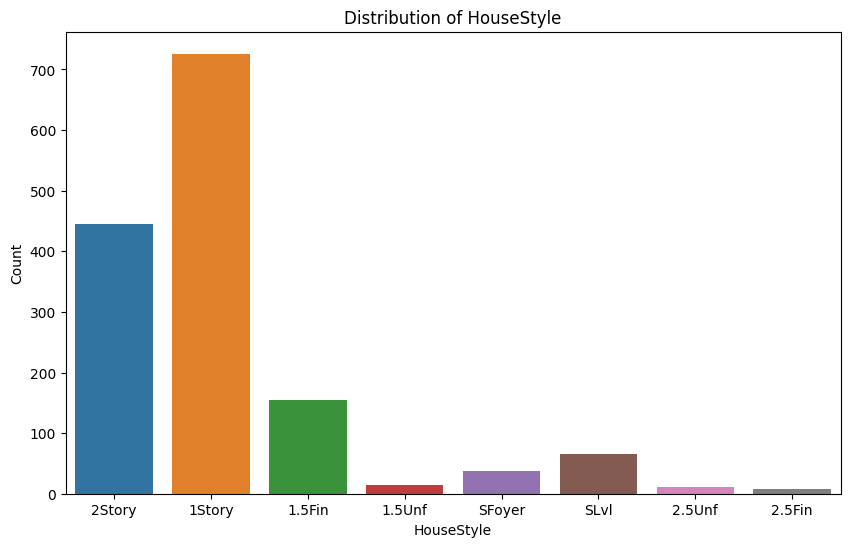

In [24]:
# plot the histogram to illustrate the distribution of "LotArea"
plt.figure(figsize=(10, 6))
sns.distplot(df["LotArea"], bins=50, kde=False)
plt.title("Distribution of LotArea")
plt.xlabel("LotArea")
plt.ylabel("Count")
plt.savefig(os.path.join(IMG_PATH, "LotArea.png"))

# plot the histogram to illustrate the distribution of "HouseStyle"
plt.figure(figsize=(10, 6))
sns.countplot(x=df["HouseStyle"])
plt.title("Distribution of HouseStyle")
plt.xlabel("HouseStyle")
plt.ylabel("Count")
plt.savefig(os.path.join(IMG_PATH, "HouseStyle.png"))


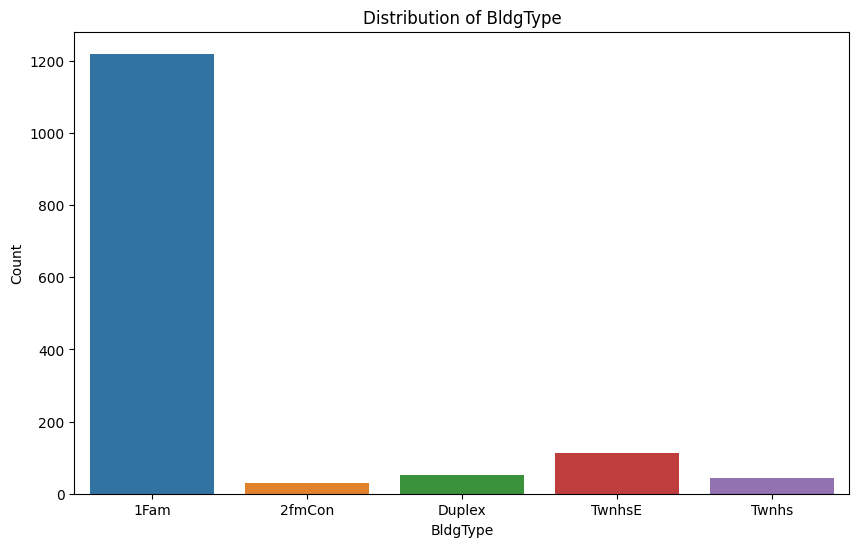

In [25]:
# plot the histogram to illustrate the distribution of "HouseStyle"
plt.figure(figsize=(10, 6))
sns.countplot(x=df["BldgType"])
plt.title("Distribution of BldgType")
plt.xlabel("BldgType")
plt.ylabel("Count")
plt.savefig(os.path.join(IMG_PATH, "BldgType.png"))

## Feature Engineering


### Feature selection

Based on the data description, we can identify the features that best represent the relationship. By doing so, we can remove the features that don't influence the target, thereby reducing the size of the feature space


In [26]:
# Numerical features to be kept
num_features = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageArea",
    "PoolArea",
    "YrSold",
]

# Categorical features to be kept
cat_features = [
    "MSZoning",
    "Utilities",  # ordinal
    "LandSlope",  # ordinal
    "BldgType",
    "HouseStyle",
    "ExterQual",  # ordinal
    "ExterCond",  # ordinal
    "BsmtQual",  # ordinal
    "BsmtCond",  # ordinal
    "HeatingQC",  # ordinal
    "CentralAir",  # -> 0, 1
    "KitchenQual",  # ordinal
    "FireplaceQu",  # ordinal
    "GarageQual",  # ordinal
    "GarageCond",  # ordinal
    "PoolQC",  # ordinal
    "SaleType",
]

features_to_keep = num_features + cat_features

print("# of numerical features: ", len(num_features))
print("# of categorical features: ", len(cat_features))
print("total: ", len(features_to_keep))

# of numerical features:  20
# of categorical features:  17
total:  37


In [27]:
# Two helper functions to keep or drop features
def keep_features(df, features_to_keep):
    """
    Keep only the needed feature columns in the dataset

    Args:
        df: a Pandas dataframe of the dataset
        features_to_keep: a list of features to be kept

    Return:
        A Pandas dataframe containing the needed features
    """
    return df[features_to_keep]


def drop_features(df, features_to_drop):
    """
    Keep only the needed feature columns in the dataset

    Args:
        df: a Pandas dataframe of the dataset
        features_to_drop: a list of features to be dropped

    Return:
        A Pandas dataframe containing the needed features
    """
    return df.drop(features_to_drop, axis=1)

In [28]:
# Keep only the representative features
df = keep_features(df, features_to_keep)
print(f"Shape of the training data: {df.shape}")

df

Shape of the training data: (1460, 37)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,...,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,856,1710,1,...,Gd,TA,Ex,Y,Gd,NaN,TA,TA,NaN,WD
2,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,...,Gd,TA,Ex,Y,TA,TA,TA,TA,NaN,WD
3,68.0,11250,7,5,2001,2002,162.0,920,1786,1,...,Gd,TA,Ex,Y,Gd,TA,TA,TA,NaN,WD
4,60.0,9550,7,5,1915,1970,0.0,756,1717,1,...,TA,Gd,Gd,Y,Gd,Gd,TA,TA,NaN,WD
5,84.0,14260,8,5,2000,2000,350.0,1145,2198,1,...,Gd,TA,Ex,Y,Gd,TA,TA,TA,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,953,1647,0,...,Gd,TA,Ex,Y,TA,TA,TA,TA,NaN,WD
1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,1,...,Gd,TA,TA,Y,TA,TA,TA,TA,NaN,WD
1458,66.0,9042,7,9,1941,2006,0.0,1152,2340,0,...,TA,Gd,Ex,Y,Gd,Gd,TA,TA,NaN,WD


### Handling missing values

First, we will drop the features with more than 50% missing values. Then, for categorical features, we will fill the missing values with the most frequent value (i.e. mode). For numerical features, we will fill the missing values with the mean of the feature.


In [29]:
# Determine which features to be dropped based on the percentage of NA values in the training data
def get_feature_to_drop_by_hight_na(df_train, feature_list, threshold):
    """
    Determine which features to be dropped based on the percentage of NA values
    in the training data

    Args:
        df_train: a Pandas dataframe containing the training data
        feature_list: a list of features to be checked
        threshold: a float number indicating the threshold of NA percentage

    Return:
        A list containing the features to be dropped
    """
    null_counts = df_train.loc[:, feature_list].isna().sum() / len(df_train)
    return list(null_counts[null_counts > threshold].index)


# Drop the features with NA values more than 30%
features_to_drop_by_hight_na = get_feature_to_drop_by_hight_na(
    df, df.columns, threshold=0.3)

print("The features need to be dropped due to high volumes of NA values:")
print(features_to_drop_by_hight_na)

The features need to be dropped due to high volumes of NA values:
['FireplaceQu', 'PoolQC']


In [30]:
# Drop the categorical features with high NA values
cat_features = list(set(cat_features) - set(features_to_drop_by_hight_na))
df = drop_features(df, features_to_drop_by_hight_na)

print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (1460, 35)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,856,1710,1,...,Gd,TA,Gd,TA,Ex,Y,Gd,TA,TA,WD
2,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,...,TA,TA,Gd,TA,Ex,Y,TA,TA,TA,WD
3,68.0,11250,7,5,2001,2002,162.0,920,1786,1,...,Gd,TA,Gd,TA,Ex,Y,Gd,TA,TA,WD
4,60.0,9550,7,5,1915,1970,0.0,756,1717,1,...,TA,TA,TA,Gd,Gd,Y,Gd,TA,TA,WD
5,84.0,14260,8,5,2000,2000,350.0,1145,2198,1,...,Gd,TA,Gd,TA,Ex,Y,Gd,TA,TA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,953,1647,0,...,TA,TA,Gd,TA,Ex,Y,TA,TA,TA,WD
1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,1,...,TA,TA,Gd,TA,TA,Y,TA,TA,TA,WD
1458,66.0,9042,7,9,1941,2006,0.0,1152,2340,0,...,Ex,Gd,TA,Gd,Ex,Y,Gd,TA,TA,WD


In [31]:
# Get the mathematical measures of each feature
def get_fea_measures_dict(df_train, feature_list, measure="mode"):
    """
    Create a dict to map the mode/mean/median of each feature in the training dataset,
    which can be used to transform the test dataset

    Args:
        df_train: a Pandas dataframe containing the training data
        feature_list: a list of features to measure on
        measure: mode/mean/median

    Return:
        A dict containing the measure of each feature
    """
    measure_dict = dict()
    for col in feature_list:
        if measure == "mode":
            measure_dict[col] = df_train[col].mode()[0]
        elif measure == "mean":
            measure_dict[col] = df_train[col].mean()
        elif measure == "median":
            measure_dict[col] = df_train[col].median()
        else:
            raise ValueError("measure should be mode/mean/median")
    return measure_dict


cat_mode_dict = get_fea_measures_dict(df, cat_features, "mode")
num_mean_dict = get_fea_measures_dict(df, num_features, "mean")

In [32]:
# Fill the NA values in categorical/numerical features with the mode/mean of the features in the training dataset
def fill_na_with_measures(df, measure_dict):
    """
    Fill the NA values in features with the measures of the features in the training dataset

    Args:
        df: a Pandas dataframe containing the data to be transformed
        measure_dict: a dict containing the measure of each feature

    Return:
        A Pandas dataframe after NA values being filled
    """
    for col in measure_dict.keys():
        df[col].fillna(measure_dict[col], inplace=True)
    return df


df = fill_na_with_measures(
    df, cat_mode_dict
)  # Fill categorical features NA with the mode
df = fill_na_with_measures(
    df, num_mean_dict
)  # Fill numerical features NA with the mean

# Check if there are still NA values in the numerical features
print("Number of NA values in the training data's numerical features:")
print(df.isna().sum().sum())
print(f"Shape of the training data: {df.shape}")
df

Number of NA values in the training data's numerical features:
0
Shape of the training data: (1460, 35)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,856,1710,1,...,Gd,TA,Gd,TA,Ex,Y,Gd,TA,TA,WD
2,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,...,TA,TA,Gd,TA,Ex,Y,TA,TA,TA,WD
3,68.0,11250,7,5,2001,2002,162.0,920,1786,1,...,Gd,TA,Gd,TA,Ex,Y,Gd,TA,TA,WD
4,60.0,9550,7,5,1915,1970,0.0,756,1717,1,...,TA,TA,TA,Gd,Gd,Y,Gd,TA,TA,WD
5,84.0,14260,8,5,2000,2000,350.0,1145,2198,1,...,Gd,TA,Gd,TA,Ex,Y,Gd,TA,TA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,953,1647,0,...,TA,TA,Gd,TA,Ex,Y,TA,TA,TA,WD
1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,1,...,TA,TA,Gd,TA,TA,Y,TA,TA,TA,WD
1458,66.0,9042,7,9,1941,2006,0.0,1152,2340,0,...,Ex,Gd,TA,Gd,Ex,Y,Gd,TA,TA,WD


### Transforming ordinal features

There are several ordinal features in the categorical features. We will transform them into numerical features.


In [33]:
def convert_ordinal_to_num(df, qual_features, qual_num_dict):
    """
    Convert ordinal features to numerical values

    Args:
        df: a Pandas dataframe containing the data to be transformed
        qual_features: a list of features to be converted
        qual_num_dict: a dict containing the mapping from quality to ordinal values

    Return:
        A Pandas dataframe after the conversion
    """
    for col in qual_features:
        df[col] = df[col].map(qual_num_dict)
    return df

In [34]:
# Convert features that measure quality to ordinal values
qual_features = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "GarageQual",
    "GarageCond",
    "FireplaceQu",
    "PoolQC",
]

qual_num_dict = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": 0,
}


qual_features = list(set(qual_features) - set(features_to_drop_by_hight_na))

df = convert_ordinal_to_num(df, qual_features, qual_num_dict)
num_features = list(set(num_features) - set(qual_features)) + qual_features
cat_features = list(set(cat_features) - set(qual_features))
print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (1460, 35)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,856,1710,1,...,4,3,4,3,5,Y,4,3,3,WD
2,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,...,3,3,4,3,5,Y,3,3,3,WD
3,68.0,11250,7,5,2001,2002,162.0,920,1786,1,...,4,3,4,3,5,Y,4,3,3,WD
4,60.0,9550,7,5,1915,1970,0.0,756,1717,1,...,3,3,3,4,4,Y,4,3,3,WD
5,84.0,14260,8,5,2000,2000,350.0,1145,2198,1,...,4,3,4,3,5,Y,4,3,3,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,953,1647,0,...,3,3,4,3,5,Y,3,3,3,WD
1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,1,...,3,3,4,3,3,Y,3,3,3,WD
1458,66.0,9042,7,9,1941,2006,0.0,1152,2340,0,...,5,4,3,4,5,Y,4,3,3,WD


In [35]:
# Convert features that measure utilities to ordinal values
utilities_features = ["Utilities"]

utilities_num_dict = {
    "AllPub": 3,
    "NoSewr": 2,
    "NoSeWa": 1,
    "ELO": 0,
}


utilities_features = list(set(utilities_features) -
                          set(features_to_drop_by_hight_na))

df = convert_ordinal_to_num(df, utilities_features, utilities_num_dict)
num_features = list(set(num_features) -
                    set(utilities_features)) + utilities_features
cat_features = list(set(cat_features) - set(utilities_features))
print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (1460, 35)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,856,1710,1,...,4,3,4,3,5,Y,4,3,3,WD
2,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,...,3,3,4,3,5,Y,3,3,3,WD
3,68.0,11250,7,5,2001,2002,162.0,920,1786,1,...,4,3,4,3,5,Y,4,3,3,WD
4,60.0,9550,7,5,1915,1970,0.0,756,1717,1,...,3,3,3,4,4,Y,4,3,3,WD
5,84.0,14260,8,5,2000,2000,350.0,1145,2198,1,...,4,3,4,3,5,Y,4,3,3,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,953,1647,0,...,3,3,4,3,5,Y,3,3,3,WD
1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,1,...,3,3,4,3,3,Y,3,3,3,WD
1458,66.0,9042,7,9,1941,2006,0.0,1152,2340,0,...,5,4,3,4,5,Y,4,3,3,WD


In [36]:
# Convert features that measure land slope to ordinal values
landslop_features = ["LandSlope"]

landslop_num_dict = {
    "Gtl": 2,
    "Mod": 1,
    "Sev": 0,
}


landslop_features = list(set(landslop_features) -
                         set(features_to_drop_by_hight_na))

df = convert_ordinal_to_num(df, landslop_features, landslop_num_dict)
num_features = list(set(num_features) -
                    set(landslop_features)) + landslop_features
cat_features = list(set(cat_features) - set(landslop_features))
print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (1460, 35)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,856,1710,1,...,4,3,4,3,5,Y,4,3,3,WD
2,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,...,3,3,4,3,5,Y,3,3,3,WD
3,68.0,11250,7,5,2001,2002,162.0,920,1786,1,...,4,3,4,3,5,Y,4,3,3,WD
4,60.0,9550,7,5,1915,1970,0.0,756,1717,1,...,3,3,3,4,4,Y,4,3,3,WD
5,84.0,14260,8,5,2000,2000,350.0,1145,2198,1,...,4,3,4,3,5,Y,4,3,3,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,953,1647,0,...,3,3,4,3,5,Y,3,3,3,WD
1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,1,...,3,3,4,3,3,Y,3,3,3,WD
1458,66.0,9042,7,9,1941,2006,0.0,1152,2340,0,...,5,4,3,4,5,Y,4,3,3,WD


In [37]:
# Convert features that measure central ac to ordinal values
centralair_features = ["CentralAir"]

centralair_num_dict = {
    "N": 0,
    "Y": 1,
}


centralair_features = list(
    set(centralair_features) - set(features_to_drop_by_hight_na))

df = convert_ordinal_to_num(df, centralair_features, centralair_num_dict)
num_features = list(set(num_features) -
                    set(centralair_features)) + centralair_features
cat_features = list(set(cat_features) - set(centralair_features))
print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (1460, 35)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,...,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,856,1710,1,...,4,3,4,3,5,1,4,3,3,WD
2,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,...,3,3,4,3,5,1,3,3,3,WD
3,68.0,11250,7,5,2001,2002,162.0,920,1786,1,...,4,3,4,3,5,1,4,3,3,WD
4,60.0,9550,7,5,1915,1970,0.0,756,1717,1,...,3,3,3,4,4,1,4,3,3,WD
5,84.0,14260,8,5,2000,2000,350.0,1145,2198,1,...,4,3,4,3,5,1,4,3,3,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,953,1647,0,...,3,3,4,3,5,1,3,3,3,WD
1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,1,...,3,3,4,3,3,1,3,3,3,WD
1458,66.0,9042,7,9,1941,2006,0.0,1152,2340,0,...,5,4,3,4,5,1,4,3,3,WD


### Encoding categorical features

First, we will drop the features with high skewness as they do not provide much information. Then, we will encode the categorical features using one-hot encoding.


In [38]:
# Drop the features with high skewness
def get_skewed_features(df, feature_list, threshold=0.7):
    """
    Get the skewed features

    Args:
        df: a Pandas dataframe containing the data to be transformed
        feature_list: a list of features to be checked
        threshold: a float number indicating the threshold of skewness

    Return:
        A list containing the skewed features
    """
    skewed_features = list()
    for col in feature_list:
        if df[col].value_counts(normalize=True).values[0] > threshold:
            skewed_features.append(col)
    return skewed_features


feature_to_drop_skewed = get_skewed_features(df, cat_features)

print("The features need to be dropped due to high skewness:")
print(feature_to_drop_skewed)

# Drop the skewed categorical features
df = drop_features(df, feature_to_drop_skewed)

# Update the categorical features list
cat_features = list(set(cat_features) - set(feature_to_drop_skewed))

print(f"Shape of the training data: {df.shape}")
df

The features need to be dropped due to high skewness:
['BldgType', 'SaleType', 'MSZoning']
Shape of the training data: (1460, 32)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,...,HouseStyle,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,856,1710,1,...,2Story,4,3,4,3,5,1,4,3,3
2,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,...,1Story,3,3,4,3,5,1,3,3,3
3,68.0,11250,7,5,2001,2002,162.0,920,1786,1,...,2Story,4,3,4,3,5,1,4,3,3
4,60.0,9550,7,5,1915,1970,0.0,756,1717,1,...,2Story,3,3,3,4,4,1,4,3,3
5,84.0,14260,8,5,2000,2000,350.0,1145,2198,1,...,2Story,4,3,4,3,5,1,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,953,1647,0,...,2Story,3,3,4,3,5,1,3,3,3
1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,1,...,1Story,3,3,4,3,3,1,3,3,3
1458,66.0,9042,7,9,1941,2006,0.0,1152,2340,0,...,2Story,5,4,3,4,5,1,4,3,3


In [39]:
# Print the final feature list
print("Final feature list:")
print(df.columns.tolist())

Final feature list:
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'PoolArea', 'YrSold', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageQual', 'GarageCond']


In [40]:
# Create a dict containing all the feature names of each categorical feature
def get_categories_list(df_train, categorical_features):
    """
    Create a dict containing all the feature names of each categorical feature from the training data

    Arg:
        df_train: a Pandas dataframe for training data
        categorical_features: a list of categorical feature names

    Return:
        A dict whose key is each categorical feature and value is the category name
    """
    categories = dict()
    for col in categorical_features:
        categories[col] = df_train[col].unique().tolist()

    return categories


categories_dict = get_categories_list(df, cat_features)

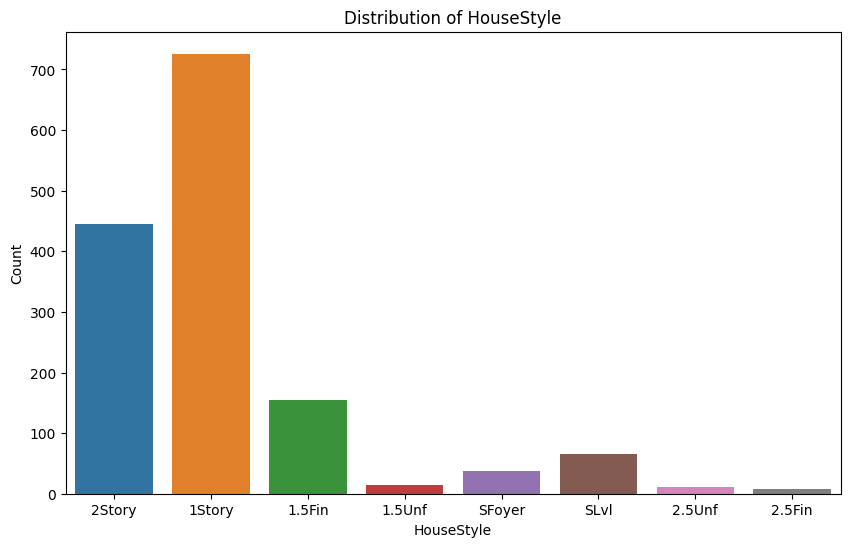

In [41]:
# Plot feature histogram to HouseStyle before one-hot encoding
plt.figure(figsize=(10, 6))
sns.countplot(x=df["HouseStyle"])
plt.title("Distribution of HouseStyle")
plt.xlabel("HouseStyle")
plt.ylabel("Count")
plt.savefig(os.path.join(IMG_PATH, "HouseStyle_before.png"))

In [42]:
# Perform one-hot encoding to the training dataset
def apply_one_hot_encode(df, categories_dict):
    """
    Perform one-hot encoding to the dataset given the categories dict generated from the training dataset

    Args:
        df: a Pandas dataframe containing the data
        categories_dict: a dict whose key is each categorical feature and value is the category name

    Return:
        A pandas dataframe after one-hot encoding on the categorical data
    """
    for col, categories in categories_dict.items():
        for category in categories:
            df[f"{col}_{category}"] = (df[col] == category).astype(int)
        df.drop(col, axis=1, inplace=True)
    return df


df = apply_one_hot_encode(df, categories_dict)

print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (1460, 39)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,...,GarageQual,GarageCond,HouseStyle_2Story,HouseStyle_1Story,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_2.5Unf,HouseStyle_2.5Fin
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,856,1710,1,...,3,3,1,0,0,0,0,0,0,0
2,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,...,3,3,0,1,0,0,0,0,0,0
3,68.0,11250,7,5,2001,2002,162.0,920,1786,1,...,3,3,1,0,0,0,0,0,0,0
4,60.0,9550,7,5,1915,1970,0.0,756,1717,1,...,3,3,1,0,0,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,1145,2198,1,...,3,3,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,0.0,953,1647,0,...,3,3,1,0,0,0,0,0,0,0
1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,1,...,3,3,0,1,0,0,0,0,0,0
1458,66.0,9042,7,9,1941,2006,0.0,1152,2340,0,...,3,3,1,0,0,0,0,0,0,0


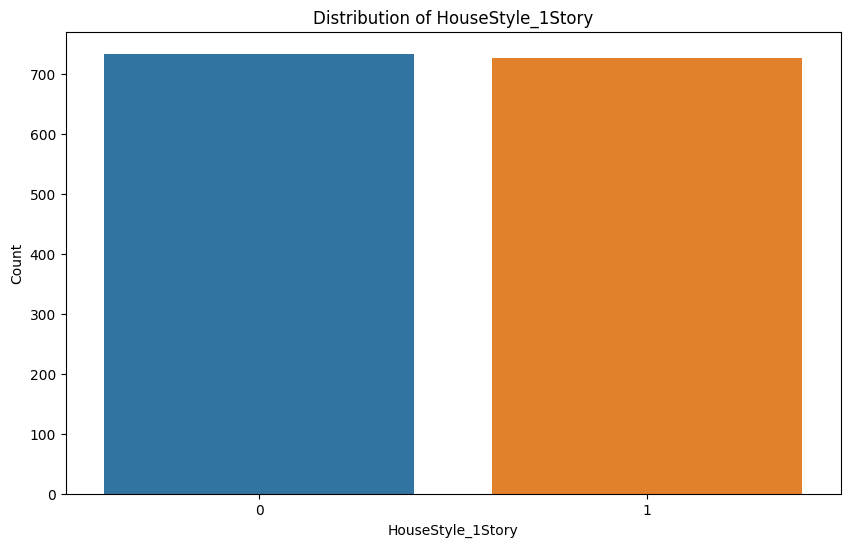

In [43]:
# Plot feature histogram to HouseStyle after one-hot encoding
plt.figure(figsize=(10, 6))
sns.countplot(x=df["HouseStyle_1Story"])
plt.title("Distribution of HouseStyle_1Story")
plt.xlabel("HouseStyle_1Story")
plt.ylabel("Count")
plt.savefig(os.path.join(IMG_PATH, "HouseStyle_after.png"))

In [44]:
print(f"The categorical features: {cat_features}")

The categorical features: ['HouseStyle']


### Scaling numerical features


In [45]:
from sklearn.preprocessing import Normalizer

X_normalized = Normalizer().fit_transform(df)

## Model Training


In [46]:
print(f"Shape of the training data: {X_normalized.shape}")
print(f"Shape of the training Y: {target.shape}")

Shape of the training data: (1460, 39)
Shape of the training Y: (1460,)


In [47]:
# Compute OLS from scratch
def OLS(X, Y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta


# Fit the model for best parameters
theta = OLS(X_normalized, target)

# Inference
pred = X_normalized.dot(theta)

## Model Validation


In [48]:
# Compute MSE from scratch
MSE = 0.5 * np.mean((target - pred)**2)

# Compute r_sqaured from scratch
target_mean = np.mean(target)
sst = np.sum((target - target_mean) ** 2)  # total sum of squares (SST)
ssr = np.sum((target - pred) ** 2)  # residual sum of squares (SSR)
r_squared = 1 - (ssr / sst)

print('Evaluate predictions on training set: MSE: ' +
      str(MSE)+', r^2: '+str(r_squared))

Evaluate predictions on training set: MSE: 974304111.6580482, r^2: 0.6910300389896178


In [49]:
# Run inference on the test data
def infer(filename):
    # 1. Load the test data
    df_test = load_data_from_csv(filename)

    # 2. Keep the needed features
    df_test = keep_features(df_test, features_to_keep)

    # 3. Drop the features with high NA values
    df_test = drop_features(df_test, features_to_drop_by_hight_na)

    # 4. Fill the NA values in categorical/numerical features with the mode/mean of the features in the training dataset
    df_test = fill_na_with_measures(df_test, cat_mode_dict)
    df_test = fill_na_with_measures(df_test, num_mean_dict)

    # 5. Convert features that measure quality to ordinal values
    df_test = convert_ordinal_to_num(df_test, qual_features, qual_num_dict)

    # 6. Convert features that measure utilities to ordinal values
    df_test = convert_ordinal_to_num(
        df_test, utilities_features, utilities_num_dict)

    # 7. Convert features that measure land slope to ordinal values
    df_test = convert_ordinal_to_num(
        df_test, landslop_features, landslop_num_dict)

    # 8. Convert features that measure central ac to ordinal values
    df_test = convert_ordinal_to_num(
        df_test, centralair_features, centralair_num_dict)

    # 9. Drop the features with high skewness
    df_test = drop_features(df_test, feature_to_drop_skewed)

    # 10. Perform one-hot encoding to the training dataset
    df_test = apply_one_hot_encode(df_test, categories_dict)

    # 11. Normalize the data
    X_test_normalized = Normalizer().fit_transform(df_test)

    # 12. Inference
    pred = X_test_normalized.dot(theta)

    # 13. Save the result with the filename "submission_{YYMMDDHH}.csv"
    df_test["SalePrice"] = pred
    df_test[["SalePrice"]].to_csv(os.path.join(
        RESULT_PATH, f"submission_{time.strftime('%Y%m%d%H')}.csv"))

    return df_test


# Run inference on the test data
df_test = infer("test.csv")